# Loan Application Success Prediction

## Introduction

**Objective:**  
The goal of this project is to develop a classification model to predict the likelihood of a loan application’s success based on a set of applicant features. This model aims to assist in making informed, risk-based decisions regarding loan approvals, enhancing both efficiency and reliability in the lending process.

---
**Importance of Risk Modeling:**  
Classifying applications as either "successful" or "rejected" is essential for responsible lending. A well-calibrated model allows lenders to:
- Minimize risk by identifying applicants more likely to repay.
- Improve customer satisfaction by streamlining approvals for strong applicants.
- Reduce potential losses from unsuccessful loans.
---
**Key Objectives:**  
1. **Build and Evaluate the Model:** Develop a classification model to predict loan success and assess its effectiveness through standard evaluation metrics.
2. **Productionization Considerations:** Discuss how this model could be used in real-time lending decisions, with attention to scalability, reliability, and model governance.



# Data Exploration & Preprocessing
---
1.Import Packages\
2.Loading data with Pandas\
3.Intial Quality Check\
4.Descriptive Statistics of Data\
5.Data Cleaning\
6.Data Visualization\
7.Data pre-processing

---

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# shows plots in jupyter notebook
%matplotlib inline

## Loading data with Pandas

In [2]:
Application_Sample = pd.read_csv("application_samples.csv")
Credit_Features = pd.read_csv("credit_features.csv")

In [3]:
Application_Sample

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0
...,...,...,...,...,...,...,...
8842,8681053,17/11/2020,5000,60,Employed - full time,Wedding,0
8843,8768469,20/11/2020,8000,24,Employed - full time,Wedding,0
8844,8794971,22/11/2020,1000,36,Employed - full time,Wedding deposit,0
8845,8875138,24/11/2020,10000,60,Self employed,Wedding,0


This dataset contains information on loan applications.

In [4]:
Credit_Features

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,9679857,399,13,23,16,0,0,0,7,118.09,187302,23018,-1,0
8843,9680193,217,23,5,4,0,0,0,1,85.40,264,264,-1,0
8844,9681405,3,1,2,2,0,0,2,0,2.00,0,0,-1,0
8845,9684198,178,15,23,17,0,1,0,6,66.91,10071,10071,-1,7


This dataset provides credit-related account features of each applicant.

**Initial Observations:**

Target Variable (Success): The Success column in the application dataset will serve as the target variable for our classification model. This binary column indicates whether the loan was approved (1) or rejected (0).\
Unique Identifiers (UID): The UID field in both datasets allows us to merge them on this common identifier.

## Intial Quality Check

In [5]:
print(Application_Sample.info(), Credit_Features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UID              8847 non-null   int64 
 1   ApplicationDate  8847 non-null   object
 2   Amount           8847 non-null   int64 
 3   Term             8847 non-null   int64 
 4   EmploymentType   8847 non-null   object
 5   LoanPurpose      8847 non-null   object
 6   Success          8847 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 483.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int

In [6]:
# checking for null values percentage for both the dataset. 

print(Application_Sample.isnull().sum()/Application_Sample.shape[0]*100)
print("---------------------------------------------------")
print(Credit_Features.isnull().sum()/Credit_Features.shape[0]*100)

UID                0.0
ApplicationDate    0.0
Amount             0.0
Term               0.0
EmploymentType     0.0
LoanPurpose        0.0
Success            0.0
dtype: float64
---------------------------------------------------
UID                                     0.0
ALL_AgeOfOldestAccount                  0.0
ALL_AgeOfYoungestAccount                0.0
ALL_Count                               0.0
ALL_CountActive                         0.0
ALL_CountClosedLast12Months             0.0
ALL_CountDefaultAccounts                0.0
ALL_CountOpenedLast12Months             0.0
ALL_CountSettled                        0.0
ALL_MeanAccountAge                      0.0
ALL_SumCurrentOutstandingBal            0.0
ALL_SumCurrentOutstandingBalExcMtg      0.0
ALL_TimeSinceMostRecentDefault          0.0
ALL_WorstPaymentStatusActiveAccounts    0.0
dtype: float64


In [7]:
# Checking for Duplicates in the datasets

print(Application_Sample.duplicated().sum())
print(Credit_Features.duplicated().sum())

0
0


**Conclusion:**
No missing or duplicate values are present in either dataset.
With data completeness verified, we can proceed with exploratory data analysis (EDA) to further examine the distribution of key features
and their relationships with the target variable.

## Descriptive Statistics of Data

In [8]:
print(Application_Sample.describe().T, Credit_Features.describe().T)

          count          mean           std       min        25%        50%  \
UID      8847.0  4.753101e+06  2.766232e+06  216009.0  2376933.0  4463541.0   
Amount   8847.0  7.560692e+03  5.309139e+03     500.0     3000.0     6500.0   
Term     8847.0  4.198508e+01  1.613917e+01      12.0       24.0       48.0   
Success  8847.0  1.042161e-01  3.055580e-01       0.0        0.0        0.0   

               75%        max  
UID      7194733.0  9684478.0  
Amount     10000.0    20000.0  
Term          60.0       60.0  
Success        0.0        1.0                                          count          mean           std  \
UID                                   8847.0  4.753101e+06  2.766232e+06   
ALL_AgeOfOldestAccount                8847.0  1.626940e+02  9.456988e+01   
ALL_AgeOfYoungestAccount              8847.0  8.587431e+00  1.308187e+01   
ALL_Count                             8847.0  1.751532e+01  1.390017e+01   
ALL_CountActive                       8847.0  9.258506e+00  4.89

**Key Observations:**
> 1.The presence of -1 values across multiple columns suggests missing or placeholder data. considering the meaning behind -1 values. These values don’t just indicate missing data; they suggest that specific conditions (like default accounts, active accounts, etc.) don’t apply to certain applicants. Instead of treating -1 as traditional missing data, we can interpret it as a “no case” or “non-applicable” status.

> 2.There is a significant imbalance in the **target variable (Success)**,with a mean close to 0.104 (_only about 10.4% of applications are successful_) which may necessitate resampling methods to ensure balanced model training or choosing the right metric to evaluate the classifier.

> 3.Features such as ALL_CountDefaultAccounts, ALL_WorstPaymentStatusActiveAccounts, and ALL_SumCurrentOutstandingBal seem likely to be important predictors of loan success.

> 4.The feature AgeOfOldestAccount contains some unusually high values, with a maximum of 999 months (approximately 83 years), which appears unrealistic for this dataset. To minimize the impact of such _**outliers**_, we have to cap this feature at a more feasible limit, such as 400 months.

In [9]:
# Merge the datasets on UID column
merged_df = pd.merge(Application_Sample, Credit_Features, on='UID')

# Display basic statistics and data preview after merging
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UID,8847.0,4.753101e+06,2.766232e+06,216009.0,2376933.00,4463541.00,7194733.00,9684478.0
Amount,8847.0,7.560692e+03,5.309139e+03,500.0,3000.00,6500.00,10000.00,20000.0
Term,8847.0,4.198508e+01,1.613917e+01,12.0,24.00,48.00,60.00,60.0
Success,8847.0,1.042161e-01,3.055580e-01,0.0,0.00,0.00,0.00,1.0
ALL_AgeOfOldestAccount,8847.0,1.626940e+02,9.456988e+01,-1.0,100.00,151.00,212.00,999.0
ALL_AgeOfYoungestAccount,8847.0,8.587431e+00,1.308187e+01,-1.0,2.00,5.00,10.00,258.0
ALL_Count,8847.0,1.751532e+01,1.390017e+01,0.0,9.00,15.00,22.00,233.0
ALL_CountActive,8847.0,9.258506e+00,4.896900e+00,-1.0,6.00,9.00,12.00,43.0
ALL_CountClosedLast12Months,8847.0,1.589691e+00,2.611921e+00,-1.0,0.00,1.00,2.00,60.0
ALL_CountDefaultAccounts,8847.0,1.380355e+00,2.749450e+00,-1.0,0.00,0.00,2.00,23.0


In [10]:
# Exclude irrelevant column due to lack of variance and less predictive power
merged_df = merged_df.drop(columns=['ALL_TimeSinceMostRecentDefault','LoanPurpose','ApplicationDate','UID'], axis=1)

**Excluding Irrelevant Columns**

1. **ALL_TimeSinceMostRecentDefault**: This column contains only a single unique value (`-1`), indicating no recorded recent defaults for any applicant. Since it lacks variance, it does not contribute any valuable information for model training.
  
2. **LoanPurpose**: Although `LoanPurpose` might hold some qualitative insights, it is a high-dimensional categorical variable that may not provide significant predictive power for this specific model. Additionally, loan success is generally influenced by applicants' financial history rather than the purpose of the loan itself.

3. **ApplicationDate**: The application date does not provide information relevant to the applicant's likelihood of loan success. Therefore, it was excluded to reduce unnecessary noise in the model.

4. **UID**: This is a unique identifier for each application and does not provide predictive value for the classification task.

By removing these columns, we retain only those features features that are likely to provide meaningful predictive power.

## Data Cleaning
---
**Handling Special Values in Data**

During data exploration, we observed that several columns containing -1 values, which seem to represent specific conditions rather than traditional missing data based on our assumptions. For example:
- Columns like _ALL_CountActive_ and _ALL_CountDefaultAccounts_ show -1 values that likely mean “none” or “non-applicable” (e.g., no active accounts or defaults).
- Other columns, such as _ALL_AgeOfOldestAccount_ and _ALL_SumCurrentOutstandingBal_, have -1 values where a median or 0 replacement is reasonable, as these represent features with expected distributions (e.g., account age or balances).

We address these `-1` values as follows:

1.Replaced -1 with 0 in columns where -1 indicates "no cases," preserving the meaning without skewing numerical values.

2.Imputed -1 with the median in columns where it likely serves as a placeholder, ensuring data distribution remains intact.


In [11]:
# Define columns where -1 indicates "no cases" or "none" and should be replaced with 0
replace_with_zero_columns = [
    'ALL_CountActive', 'ALL_CountClosedLast12Months', 'ALL_CountDefaultAccounts',
    'ALL_CountOpenedLast12Months', 'ALL_CountSettled', 'ALL_WorstPaymentStatusActiveAccounts','ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg'
]

# Replace -1 with 0 in specified columns
for col in replace_with_zero_columns:
    merged_df[col] = merged_df[col].replace(-1, 0)

# Define columns where -1 should be imputed with the median
impute_with_median_columns = [
    'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_MeanAccountAge'
]

# Replace -1 with median values for imputation columns
for col in impute_with_median_columns:
    median_value = merged_df[col][merged_df[col] != -1].median()
    merged_df[col] = merged_df[col].replace(-1, median_value)

# Display summary statistics to confirm replacements
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,8847.0,7560.692438,5309.138911,500.0,3000.000,6500.00,10000.00,20000.0
Term,8847.0,41.985080,16.139168,12.0,24.000,48.00,60.00,60.0
Success,8847.0,0.104216,0.305558,0.0,0.000,0.00,0.00,1.0
ALL_AgeOfOldestAccount,8847.0,164.561772,92.812836,1.0,103.000,152.00,212.00,999.0
ALL_AgeOfYoungestAccount,8847.0,8.660676,13.044721,0.0,2.000,5.00,10.00,258.0
ALL_Count,8847.0,17.515316,13.900171,0.0,9.000,15.00,22.00,233.0
ALL_CountActive,8847.0,9.271617,4.870680,0.0,6.000,9.00,12.00,43.0
ALL_CountClosedLast12Months,8847.0,1.601899,2.602106,0.0,0.000,1.00,2.00,60.0
ALL_CountDefaultAccounts,8847.0,1.392562,2.741060,0.0,0.000,0.00,2.00,23.0
ALL_CountOpenedLast12Months,8847.0,2.465695,2.952624,0.0,1.000,2.00,3.00,62.0


**Outlier Handling to Ensure Model Stability**

To improve model stability and minimize skewed predictions, we identified and managed outliers in high-variance features like loan amounts, account ages, and outstanding balances. Using the Interquartile Range (IQR) method, we defined outliers as values beyond 1.5 times the IQR from the 25th and 75th percentiles. These boundaries help isolate extreme values that may impact accuracy. We stored outliers in a dictionary to streamline review and decide on treatments to retain data integrity and reduce skew, enhancing model performance and interpretability.

This process ensures that outliers are handled appropriately, improving model performance and interpretability by controlling the influence of extreme values.


In [12]:
# Define the columns to check for outliers
columns_to_check = [
    'Amount', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 
    'ALL_SumCurrentOutstandingBal', 'ALL_SumCurrentOutstandingBalExcMtg', 
    'ALL_Count', 'ALL_CountActive', 'ALL_WorstPaymentStatusActiveAccounts'
]

# Initialize a dictionary to store the outlier results
outliers = {}

# Loop through each column and calculate the IQR to find outliers
for col in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers in the data
    outliers[col] = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]
    
    print(f"Column: {col}")
    print(f"Number of Outliers: {len(outliers[col])}")
    print("\n")


Column: Amount
Number of Outliers: 0


Column: ALL_AgeOfOldestAccount
Number of Outliers: 198


Column: ALL_AgeOfYoungestAccount
Number of Outliers: 633


Column: ALL_SumCurrentOutstandingBal
Number of Outliers: 1127


Column: ALL_SumCurrentOutstandingBalExcMtg
Number of Outliers: 401


Column: ALL_Count
Number of Outliers: 372


Column: ALL_CountActive
Number of Outliers: 175


Column: ALL_WorstPaymentStatusActiveAccounts
Number of Outliers: 0




In [13]:
# Cap 'ALL_AgeOfOldestAccount' and 'ALL_AgeOfYoungestAccount' at reasonable max values
merged_df['ALL_AgeOfOldestAccount'] = merged_df['ALL_AgeOfOldestAccount'].clip(upper=380)
merged_df['ALL_AgeOfYoungestAccount'] = merged_df['ALL_AgeOfYoungestAccount'].clip(upper=22)

# Cap 'ALL_SumCurrentOutstandingBal' and 'ALL_SumCurrentOutstandingBalExcMtg' at the 99th percentile
balance_cap = merged_df['ALL_SumCurrentOutstandingBal'].quantile(0.99)
balance_exc_mtg_cap = merged_df['ALL_SumCurrentOutstandingBalExcMtg'].quantile(0.99)
merged_df['ALL_SumCurrentOutstandingBal'] = merged_df['ALL_SumCurrentOutstandingBal'].clip(upper=balance_cap)
merged_df['ALL_SumCurrentOutstandingBalExcMtg'] = merged_df['ALL_SumCurrentOutstandingBalExcMtg'].clip(upper=balance_exc_mtg_cap)

# Cap 'ALL_Count', 'ALL_CountActive', 'ALL_CountSettled', and 'ALL_MeanAccountAge' at appropriate percentiles
count_cap = merged_df['ALL_Count'].quantile(0.95)
count_active_cap = merged_df['ALL_CountActive'].quantile(0.95)
count_settled_cap = merged_df['ALL_CountSettled'].quantile(0.95)
mean_account_age_cap = merged_df['ALL_MeanAccountAge'].quantile(0.95)

merged_df['ALL_Count'] = merged_df['ALL_Count'].clip(upper=count_cap)
merged_df['ALL_CountActive'] = merged_df['ALL_CountActive'].clip(upper=count_active_cap)
merged_df['ALL_CountSettled'] = merged_df['ALL_CountSettled'].clip(upper=count_settled_cap)
merged_df['ALL_MeanAccountAge'] = merged_df['ALL_MeanAccountAge'].clip(upper=mean_account_age_cap)

merged_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Amount,8847.0,7560.692438,5309.138911,500.0,3000.000,6500.00,10000.00,20000.000
Term,8847.0,41.985080,16.139168,12.0,24.000,48.00,60.00,60.000
Success,8847.0,0.104216,0.305558,0.0,0.000,0.00,0.00,1.000
ALL_AgeOfOldestAccount,8847.0,162.196903,82.185684,1.0,103.000,152.00,212.00,380.000
ALL_AgeOfYoungestAccount,8847.0,7.145586,6.303200,0.0,2.000,5.00,10.00,22.000
ALL_Count,8847.0,16.496100,9.652905,0.0,9.000,15.00,22.00,39.000
ALL_CountActive,8847.0,9.092574,4.384282,0.0,6.000,9.00,12.00,18.000
ALL_CountClosedLast12Months,8847.0,1.601899,2.602106,0.0,0.000,1.00,2.00,60.000
ALL_CountDefaultAccounts,8847.0,1.392562,2.741060,0.0,0.000,0.00,2.00,23.000
ALL_CountOpenedLast12Months,8847.0,2.465695,2.952624,0.0,1.000,2.00,3.00,62.000


Based on the outlier detection results, we observed high counts of outliers in columns like ALL_AgeOfOldestAccount, ALL_AgeOfYoungestAccount, and various balance and account count features. To address this, we took the following capping steps:

- Account Ages: Capped ALL_AgeOfOldestAccount at 380 months and ALL_AgeOfYoungestAccount at 22 months, setting realistic maximum values to reduce extreme impacts.

- Current Outstanding Balances: For ALL_SumCurrentOutstandingBal and ALL_SumCurrentOutstandingBalExcMtg, we capped values at the 99th percentile, preventing unusually high balances from skewing the data.

- Account Counts and Ages: ALL_Count, ALL_CountActive, ALL_CountSettled, and ALL_MeanAccountAge were capped at their respective 95th percentiles, moderating the influence of extreme values.

This approach helps retain meaningful data while minimizing the effect of outliers on model stability.

## Data Visualization
---
Visualize distributions of numerical and categorical features in relation to the target variable

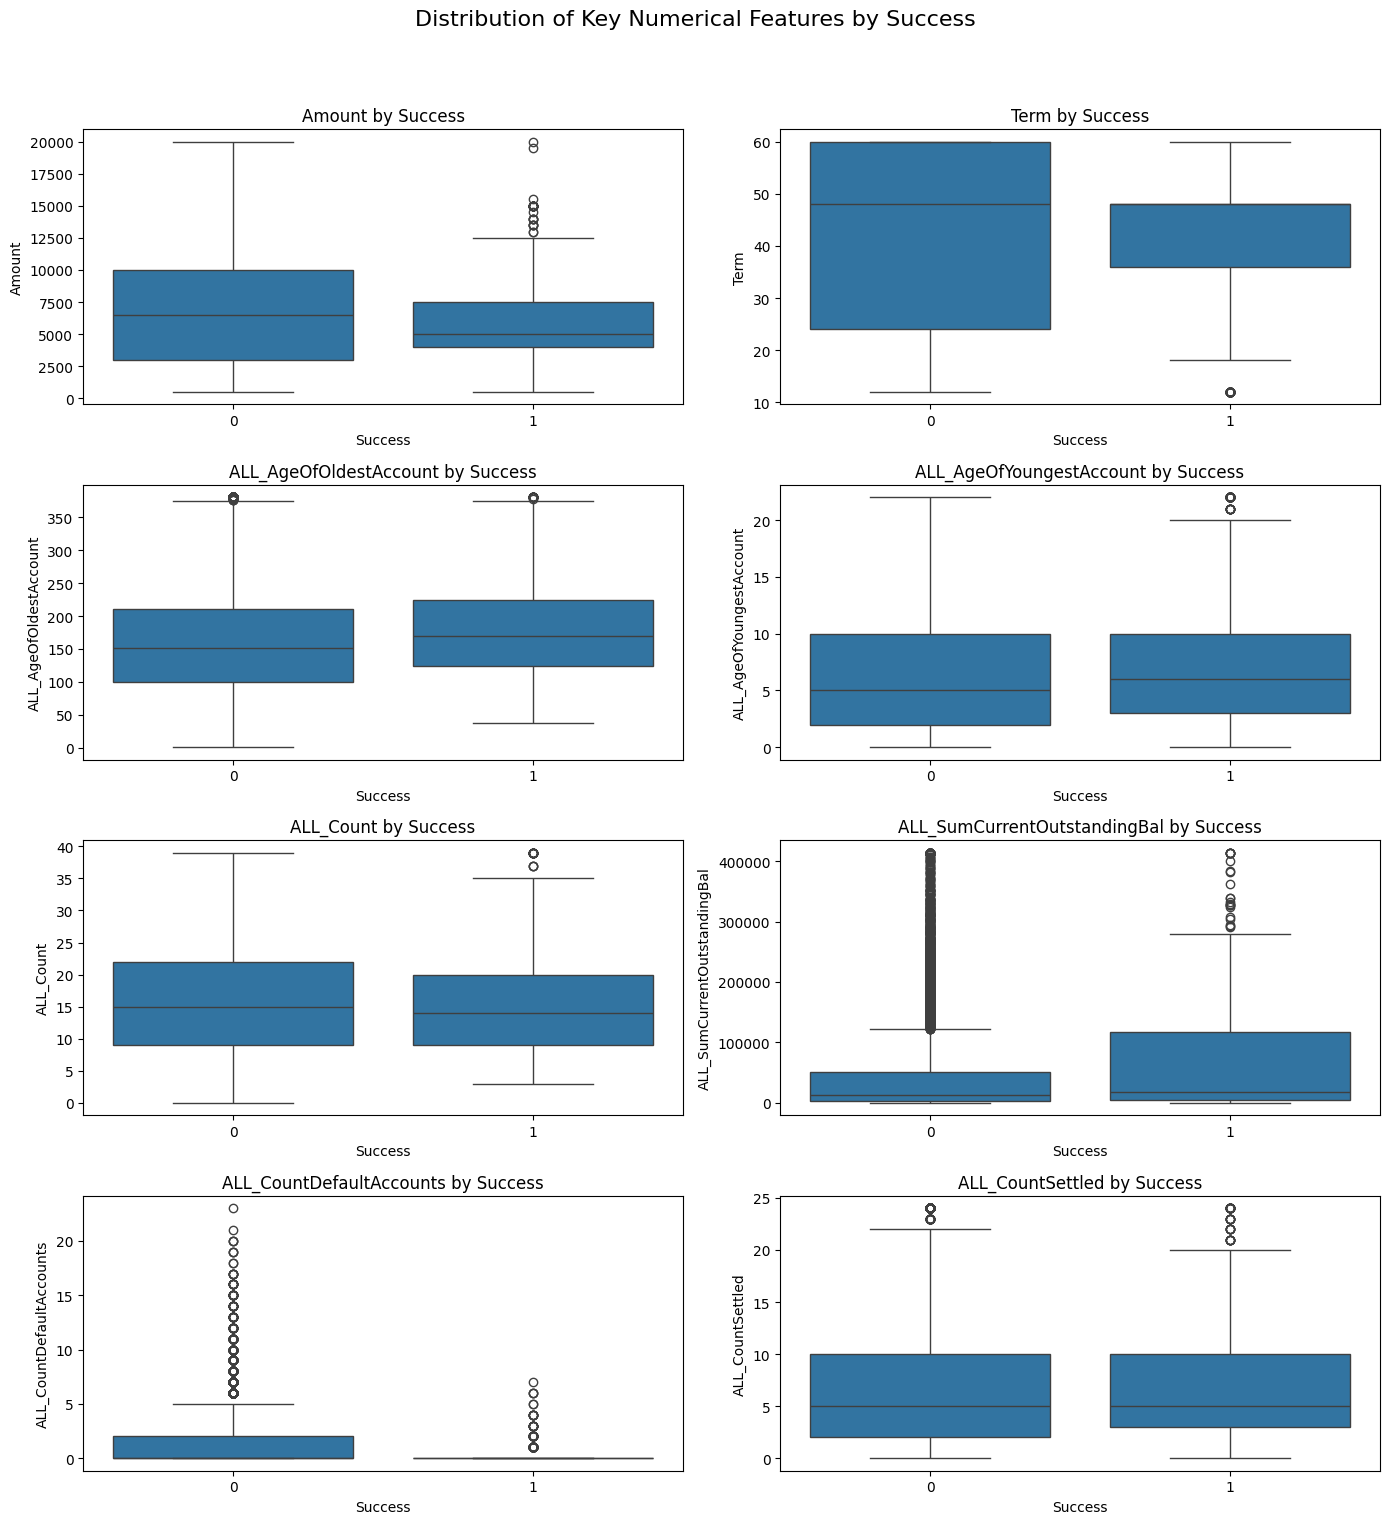

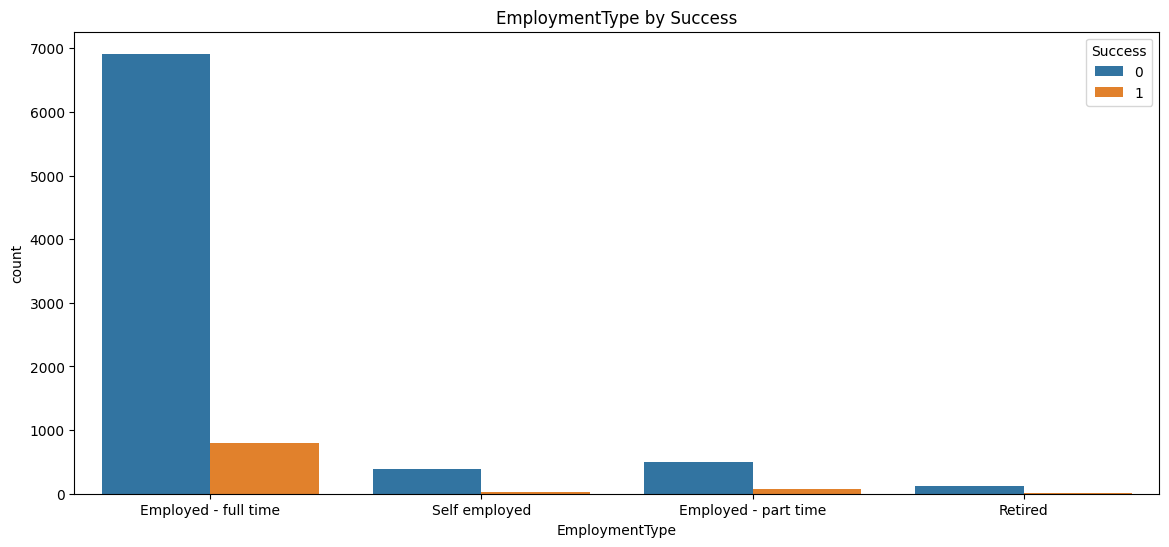

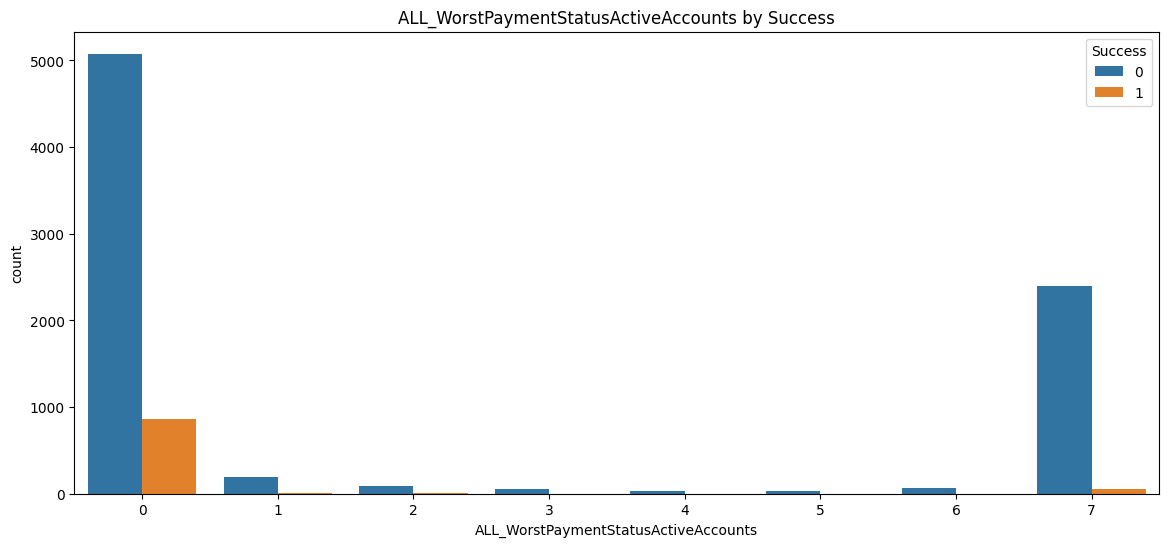

In [14]:
# Select some key numerical columns to visualize
num_features = ['Amount', 'Term', 'ALL_AgeOfOldestAccount', 'ALL_AgeOfYoungestAccount', 'ALL_Count', 'ALL_SumCurrentOutstandingBal','ALL_CountDefaultAccounts','ALL_CountSettled']
import math
n_features = len(num_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)  # Calculate rows needed

# Set up the figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
fig.suptitle("Distribution of Key Numerical Features by Success", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Bivariate Analysis - Create boxplots for each numerical feature grouped by Success
for i, feature in enumerate(num_features):
    sns.boxplot(x='Success', y=feature, data=merged_df, ax=axes[i])
    axes[i].set_title(f'{feature} by Success')
    
# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

# Visualize for ALL_WorstPaymentStatusActiveAccounts and EmploymentType by success.
plt.figure(figsize=(14, 6))
sns.countplot(x='EmploymentType', hue='Success', data=merged_df)
plt.title('EmploymentType by Success')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='ALL_WorstPaymentStatusActiveAccounts', hue='Success', data=merged_df)
plt.title('ALL_WorstPaymentStatusActiveAccounts by Success')
plt.show()


**Interpretation of Results**\
**Amount and Term:**

The Amount feature shows that higher loan amounts generally tend to have more rejections. This trend suggests that larger loan requests might be riskier, so the model could consider amount as a significant feature.\
Term also exhibits variability, with loans of longer terms (like 60 months) appearing to have more rejections. This might imply that loans with shorter terms are more favorable for approval.

**ALL_AgeOfOldestAccount and ALL_AgeOfYoungestAccount:**

Older accounts (higher values for ALL_AgeOfOldestAccount) may correlate with more approvals, potentially due to a longer credit history being viewed as favorable.\
Similarly, ALL_AgeOfYoungestAccount shows that applicants with a very young account age may be less likely to succeed, indicating that recent account openings could suggest riskier behavior.

**ALL_Count and ALL_SumCurrentOutstandingBal:**

ALL_Count (total number of accounts) shows mixed distributions, but higher counts appear slightly more common in rejections, suggesting complex financial situations may impact approval.\
ALL_SumCurrentOutstandingBal shows that applicants with lower outstanding balances are more likely to be successful, as high outstanding balances might indicate higher financial strain.

**ALL_CountDefaultAccounts and ALL_CountSettled:**

ALL_CountDefaultAccounts shows a clear trend: applicants with no defaults have higher success rates. Defaults are likely a critical indicator for rejection.\
ALL_CountSettled suggests that applicants with settled accounts may have better approval chances, likely due to a record of resolving financial obligations.

**EmploymentType:**

The count plot for EmploymentType shows that applicants with full-time employment may have higher success rates. Employment stability is often a positive indicator in credit assessments.

**ALL_WorstPaymentStatusActiveAccounts:**

The plot for ALL_WorstPaymentStatusActiveAccounts indicates that applicants with better (lower) payment statuses in active accounts are more likely to be successful. Higher worst statuses (e.g., a higher count of missed payments) could be a strong predictor of rejection.

**Implications for Model Building**
These insights suggest that features such as Amount, ALL_CountDefaultAccounts, ALL_WorstPaymentStatusActiveAccounts, and ALL_SumCurrentOutstandingBal are likely to be influential in predicting loan success. Given their apparent impact on success rates, these features should be prioritized in feature selection and model training.

## Data pre-processing
---
**Encoding Categorical Variables**

To prepare the dataset for modeling, we applied one-hot encoding to the categorical feature EmploymentType. This encoding transforms each category into a binary column, with values of 0 or 1, representing the presence or absence of each employment type.

**Scaling Decision**

For features like Amount, ALL_AgeOfOldestAccount, and ALL_SumCurrentOutstandingBal, we decided not to apply scaling or logarithmic transformation. Since tree-based models (e.g., decision trees, random forests) are not affected by feature scaling, they can handle features of different scales without impacting performance. These models use threshold-based splits, making them scale-invariant. Trees split data based on thresholds rather than assuming a specific data distribution, so they naturally handle skewed data without requiring transformations.

This preprocessing step completes our data transformation, setting up the dataset for further exploratory data analysis and feature engineering.

In [15]:
# Apply encoding and scaling, then summarize the transformed dataset for confirmation

# One-Hot Encode EmploymentType only
merged_df = pd.get_dummies(merged_df, columns=['EmploymentType'], drop_first=True)

# Convert the EmploymentType columns to binary (0 and 1) by changing True/False to 1/0
employment_columns = ['EmploymentType_Employed - part time', 'EmploymentType_Retired', 'EmploymentType_Self employed']
merged_df[employment_columns] = merged_df[employment_columns].astype(int)

# Summarize the preprocessed dataset to verify changes
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Amount                                8847 non-null   int64  
 1   Term                                  8847 non-null   int64  
 2   Success                               8847 non-null   int64  
 3   ALL_AgeOfOldestAccount                8847 non-null   int64  
 4   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 5   ALL_Count                             8847 non-null   int64  
 6   ALL_CountActive                       8847 non-null   int64  
 7   ALL_CountClosedLast12Months           8847 non-null   int64  
 8   ALL_CountDefaultAccounts              8847 non-null   int64  
 9   ALL_CountOpenedLast12Months           8847 non-null   int64  
 10  ALL_CountSettled                      8847 non-null   int64  
 11  ALL_MeanAccountAg

Let’s delve deeper into correlation analysis for key features to highlight relationships with the target variable (Success) and between features.

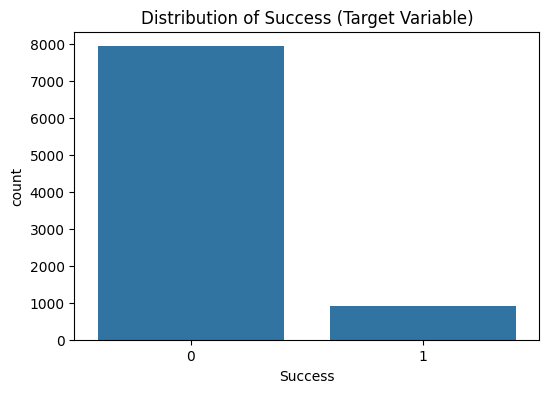

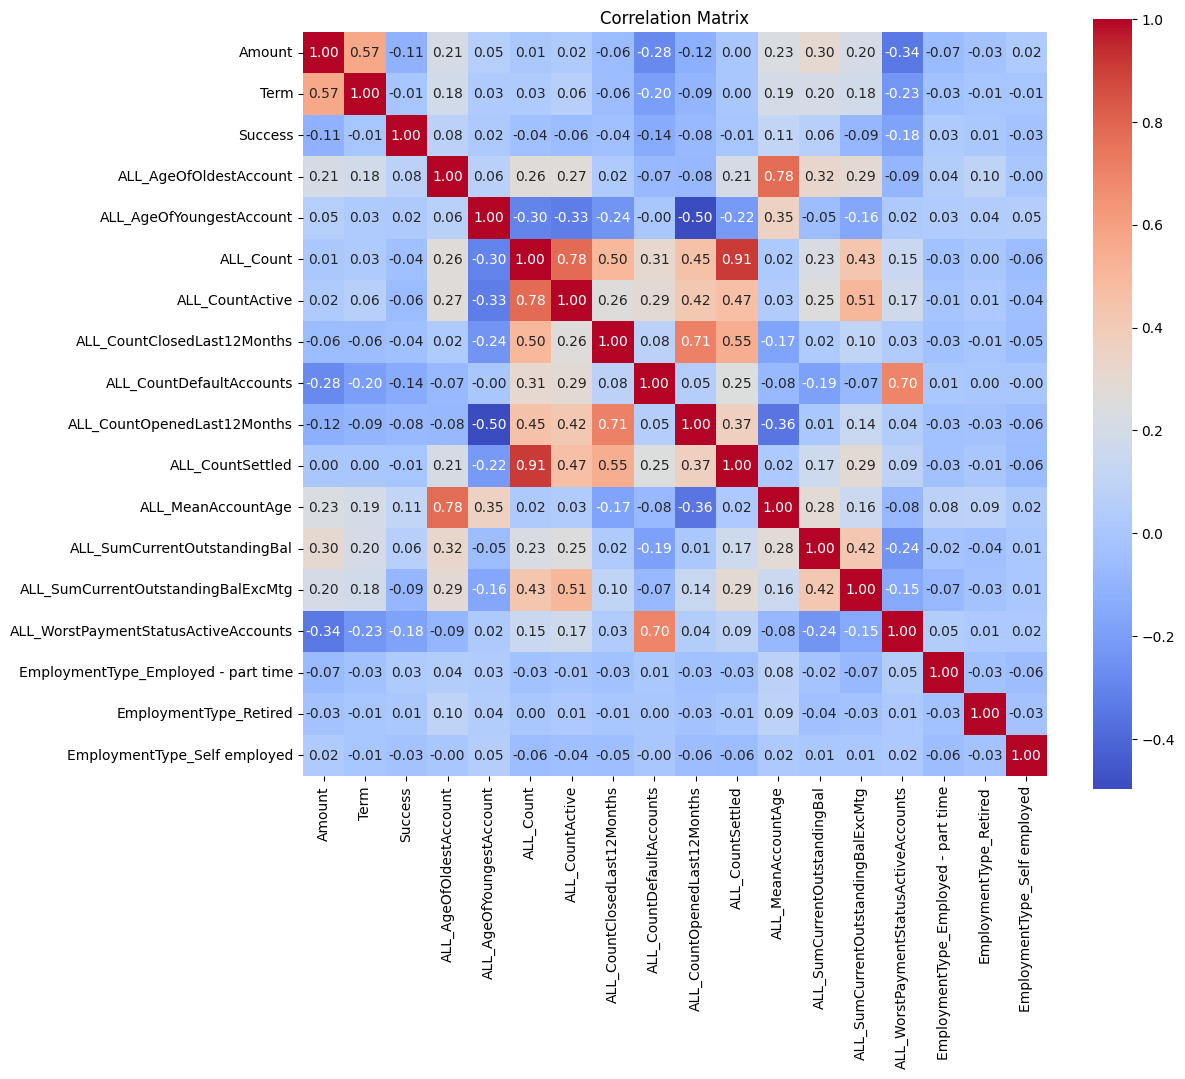

In [16]:
# Step 1: Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Success', data=merged_df)
plt.title("Distribution of Success (Target Variable)")
plt.show()

# Step 2: Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

**Interpretation of Results**

**Target Variable Distribution (First Plot)**
The target variable displays a clear imbalance, with significantly more unsuccessful (0) than successful (1) loan applications. To address this without introducing risks like overfitting through sampling, we opted for model and metric adjustments, allowing the Random Forest model to naturally handle the imbalance. With its capacity to prioritize splits based on Gini impurity or information gain, Random Forest effectively captures patterns in the minority class without data alteration. Metrics like AUC-PR and Precision will support accurate performance assessment on the minority class, making data-level modifications unnecessary.

**Correlation Matrix (Second Plot)**
Correlation Analysis: The correlation matrix highlights the following key relationships:

- ALL_CountDefaultAccounts and Success have a moderate negative correlation, implying that higher counts of default accounts are linked with unsuccessful applications.
- ALL_WorstPaymentStatusActiveAccounts also shows a negative correlation with Success, suggesting that poorer payment histories reduce the likelihood of loan approval.
- ALL_SumCurrentOutstandingBal has a weak negative correlation with Success, indicating that higher outstanding balances might contribute to rejections.
- ALL_CountSettled shows a slight positive correlation with Success, suggesting settled accounts might enhance approval chances.

These insights suggest that features like ALL_CountDefaultAccounts, ALL_WorstPaymentStatusActiveAccounts, and ALL_SumCurrentOutstandingBal could play essential roles in predicting loan success.

# Feature Engineering and Feature Selection

---
To boost the model's predictive power, we introduced new features focused on key credit risk indicators. These engineered features capture relevant aspects of an applicant's credit usage, account age, and account stability, each adding valuable context without added complexity.

First, we created the Credit Utilization Ratio to reflect an applicant’s current outstanding balance in relation to their loan request. Calculated as the outstanding balance divided by the loan amount, this ratio highlights financial strain, as higher values suggest the applicant may face challenges in managing new debt. Elevated credit utilization often correlates with a higher likelihood of rejection.

We also developed Account Age Ratios to examine credit history maturity. The Youngest to Oldest Account Age Ratio compares the age of the applicant’s youngest account to the oldest, with lower ratios implying a long-standing credit history and stability. Meanwhile, the Mean to Oldest Account Age Ratio considers the average age of accounts relative to the oldest, signaling overall credit maturity—higher values here suggest a well-established credit profile, which is generally viewed positively.

Lastly, the Active to Recently Closed Accounts Ratio assesses account stability by comparing active accounts to recently closed ones (accounting for a possible zero in the denominator). Applicants with a higher ratio demonstrate more stable account management, indicating lower risk and a potentially higher chance of loan approval.

By carefully selecting these features, we capture meaningful insights into credit usage, maturity, and stability, each of which is likely to impact loan success predictions.

In [17]:
# Creating the engineered features as specified

# 1. Credit Utilization Ratio
merged_df['CreditUtilizationRatio'] = merged_df['ALL_SumCurrentOutstandingBal'] / merged_df['Amount']

# 2. Account Age Ratios
# Ratio of youngest to oldest account age
merged_df['AccountAgeRatio_YoungestToOldest'] = merged_df['ALL_AgeOfYoungestAccount'] / merged_df['ALL_AgeOfOldestAccount']

# Ratio of mean account age to oldest account age
merged_df['AccountAgeRatio_MeanToOldest'] = merged_df['ALL_MeanAccountAge'] / merged_df['ALL_AgeOfOldestAccount']

# Ratio of active account to account closed in last 12 month
# Add 1 to the denominator to avoid division by zero if ALL_CountClosedLast12Months is zero
merged_df['ActiveClosedAccountsRatio'] = merged_df['ALL_CountActive'] / (merged_df['ALL_CountClosedLast12Months'] + 1)

# Display the first few rows of the dataset to verify the new features
merged_df[['CreditUtilizationRatio', 'AccountAgeRatio_YoungestToOldest', 
                      'AccountAgeRatio_MeanToOldest','ActiveClosedAccountsRatio']].head(10)


,CreditUtilizationRatio,AccountAgeRatio_YoungestToOldest,AccountAgeRatio_MeanToOldest,ActiveClosedAccountsRatio
0,34.277500,0.104938,0.437901,12.000000
1,0.736333,0.082707,0.393947,10.000000
2,0.255400,0.244444,0.758333,2.000000
3,1.286900,0.116564,0.414110,3.000000
4,1.160200,0.015504,0.437597,3.600000
5,0.375000,0.004926,0.180246,1.750000
6,0.090000,0.044118,0.516324,2.500000
7,17.502778,0.013072,0.364641,4.000000
8,0.783250,0.039474,0.240395,0.521739
9,4.601667,0.004292,0.320172,2.500000


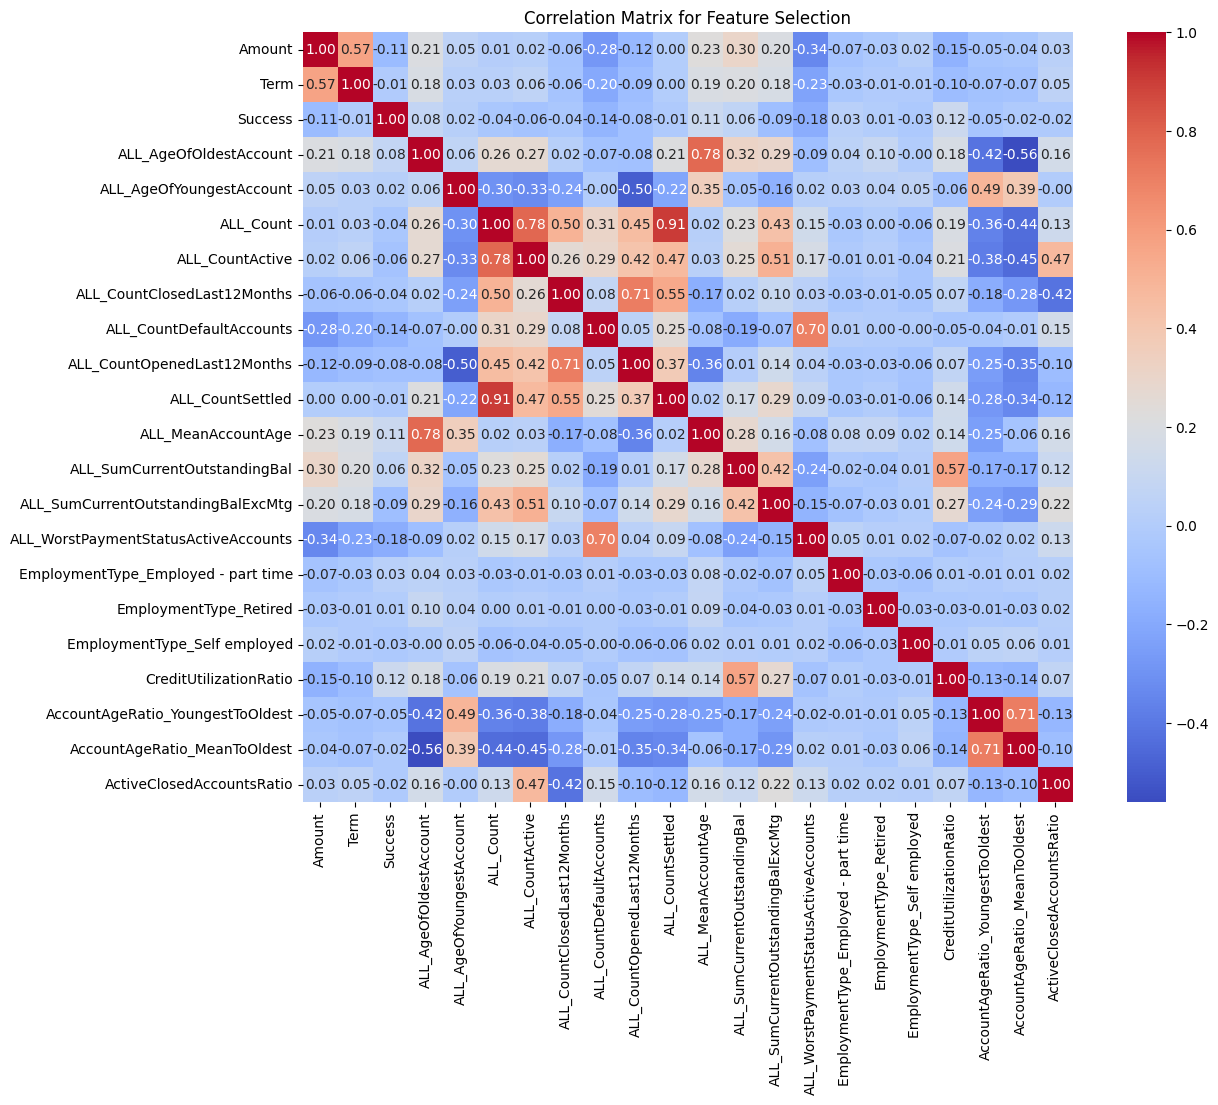

In [18]:
#visualize the correlation matrix for the dataset to evaluate feature relationships with the target variable 'Success'

# Include the 'Success' column for correlation with new features
correlation_matrix = merged_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix for Feature Selection")
plt.show()


## Feature selection with Random Forest Model
---
To improve model performance and interpretability, we used Random Forest feature importance to identify the features most predictive of loan success. 

Rather than manually removing features, which could introduce redundancy and lead to overfitting. we leveraged Random Forest’s inherent ability to assign importance, allowing the model to naturally ignore less informative features.
Using Random Forest for Feature Importance:

Random Forest is well-suited for feature selection due to its ensemble nature. By evaluating multiple decision trees, it identifies predictive features based on splits informed by Gini impurity or information gain. Our use of class weight balancing ensures that feature importance reflects relevance for both the majority and minority classes in our imbalanced dataset.

After training, we extracted and sorted feature importances to pinpoint the top predictors of loan success. This approach allowed us to retain only the most impactful features, helping reduce redundancy and enhance the model’s focus on highly predictive variables.

With the feature importance results, we plan to refine our feature set further by keeping only the top contributors, improving model efficiency and focusing on the most relevant predictors for loan outcomes.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from sklearn import metrics

# Define features and target variable
# Drop non-feature columns like UID, Application Date, etc.
features = merged_df.drop(columns=['Success'])
target = merged_df['Success']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Class_weight to help with imbalance
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance to identify top features
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features based on importance
importance_df


,Feature,Importance
0,Amount,0.120674
13,ALL_WorstPaymentStatusActiveAccounts,0.090618
12,ALL_SumCurrentOutstandingBalExcMtg,0.089767
10,ALL_MeanAccountAge,0.080617
17,CreditUtilizationRatio,0.068349
11,ALL_SumCurrentOutstandingBal,0.066982
2,ALL_AgeOfOldestAccount,0.062051
19,AccountAgeRatio_MeanToOldest,0.050851
7,ALL_CountDefaultAccounts,0.050348
4,ALL_Count,0.048100


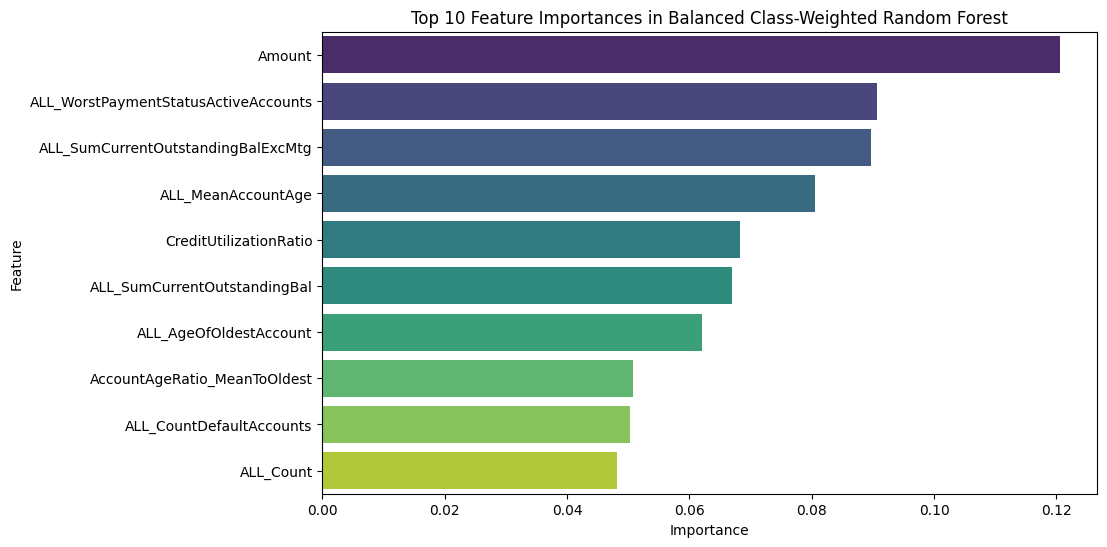

In [20]:
# Selecting the top 10 features for visualization
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances in Balanced Class-Weighted Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The plot displays the top 10 most important features as determined by the balanced class-weighted Random Forest model. 

**Conclusion**
The selected features align well with financial risk indicators and the business context, confirming their relevance for the model. This feature set should improve model accuracy and interpretability, offering a focused approach for predicting loan success.

# Model Selection and Model Training
---
We now have a dataset containing features that we have engineered and we are ready to start training a predictive model.

**Data Sampling**
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 80-20% split between train and test respectively.

In [21]:
# Updated final features list with the added feature 'AccountAgeRatio_YoungestToOldest'
final_features = [
    'Amount', 'ALL_SumCurrentOutstandingBalExcMtg', 'ALL_MeanAccountAge', 
    'ALL_WorstPaymentStatusActiveAccounts', 'CreditUtilizationRatio', 
    'ALL_AgeOfOldestAccount', 'ALL_SumCurrentOutstandingBal', 
    'AccountAgeRatio_MeanToOldest', 'ALL_Count', 'AccountAgeRatio_YoungestToOldest']
# Prepare the dataset with the updated features
X = merged_df[final_features]
y = merged_df['Success']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Training
---
Random Forest was selected because of its robustness to class imbalance, interpretability through feature importance, and ability to generalize well in complex decision-making scenarios without overfitting. This makes it a strong fit for assessing loan success, where financial risk factors must be carefully balanced to ensure accurate and explainable predictions.

Once again, we selected a Random Forest classifier due to its ensemble structure, which combines multiple decision trees to enhance predictive power and manage data complexity. By building many trees, each learning from different data samples and feature splits, Random Forest creates a "forest" of insights rather than relying on a single decision tree, which may be prone to overfitting or underfitting. This ensemble approach works much like gathering many opinions—each tree may learn different patterns, but together, they provide a balanced, reliable prediction. The result is a model that captures complex decision boundaries and improves generalization by averaging or voting across trees.

Random Forest is particularly effective with imbalanced data, as it can focus on capturing minority class patterns (in this case, successful loan applications) without requiring data resampling. The model's feature importance capability also provides valuable interpretability, helping identify which factors drive loan success—critical for risk assessment and compliance. Additional strengths include its resistance to overfitting, capacity to handle non-linear relationships, and minimal preprocessing needs.

While Random Forest does have drawbacks, such as higher computational demands, it offers a robust, scalable solution for this problem. _**Alternative models**_ like Gradient Boosting classifiers could also be effective, as they provide fine-tuned control over decision boundaries and handle imbalanced classes well. However, they tend to be computationally intensive and may require more careful tuning to avoid overfitting.


In [32]:
# Initialize and train the Random Forest model with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced') #{0: 1, 1: 3} or {0: 1, 1: 4}
rf_model.fit(X_train, y_train)

# Model evaluation on the test set
y_pred = rf_model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
y_test.value_counts()

Success
0    1586
1     184
Name: count, dtype: int64

# Evaluation Metrics (Model Performance)
---
Given the loan approval context and focus on responsible lending, we prioritized AUC-PR (Area Under the Precision-Recall Curve) and Precision as key evaluation metrics for our model. This choice is driven by the goal of reducing financial risk while ensuring high confidence in approved loans.

**Precision**(as a Priority): Precision is crucial here because it reduces false positives—in this case, high-risk loans mistakenly approved. By prioritizing precision, we ensure that when the model predicts a loan as successful, the likelihood of it being a genuinely safe approval is high. This minimizes financial risk. Precision helps avoid costly mistakes from approving risky loans, which could otherwise lead to financial loss.

**Recall**(To balance): While precision is our primary focus, we also track recall as a secondary metric. High recall is essential to avoid missing too many eligible applicants, ensuring that the model does not become overly conservative. Monitoring recall enables us to fine-tune the model, avoiding an excessive trade-off where low recall could mean rejecting applicants who are capable of repayment. By balancing precision with a reasonable recall, we achieve a practical model that minimizes risk while maintaining lending opportunities.

**AUC-PR for Imbalanced Data:**
AUC-PR is well-suited to our imbalanced dataset, where unsuccessful applications are more prevalent. Unlike AUC-ROC, which considers both classes equally, AUC-PR focuses on precision and recall for the positive (minority) class, providing a clearer view of the model’s performance in identifying successful loan applicants. A high AUC-PR score indicates that the model effectively balances precision and recall for successful loans, ensuring that it captures the minority class without being skewed by the majority.

In this project, we optimized for precision to align with risk management goals, while keeping recall as a reference metric to capture eligible applicants. This balanced approach helps ensure responsible lending, with high confidence in approved applications and a minimal risk of financial loss.

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1586
           1       0.51      0.17      0.26       184

    accuracy                           0.90      1770
   macro avg       0.71      0.58      0.60      1770
weighted avg       0.87      0.90      0.87      1770

Average Precision (AUC-PR): 0.17421249020364715
True positives: 32
False positives: 31
True negatives: 1555
False negatives: 152

Precision: 0.5079365079365079
Recall: 0.17391304347826086


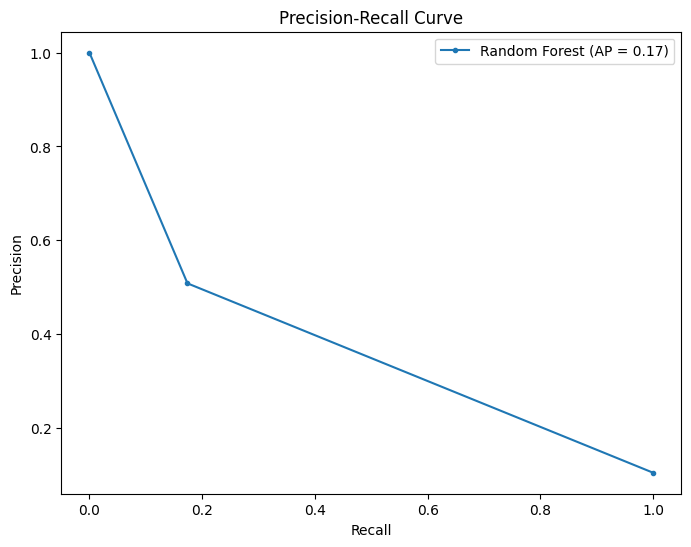

In [33]:
# Evaluate the model performance with Precision, Recall, and AUC-PR
print("Classification Report:\n", classification_report(y_test, y_pred))
average_precision = average_precision_score(y_test, y_pred)
print("Average Precision (AUC-PR):", average_precision)

# Print TP, FP, TN, FN
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Calculate and print precision and recall manually
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Random Forest (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Model Performance Analysis and Key Insights
---

- True Negatives (TN): With 1555 true negatives out of 1586 total unsuccessful loans, the model demonstrates a strong ability to identify high-risk applications accurately. This high TN count reduces potential financial risks, as unsuccessful loans are correctly flagged.
- False Negatives (FN): The model has 152 false negatives, where eligible loans are misclassified as unsuccessful. This high FN count is a concern, as each false negative represents a missed opportunity to approve an applicant capable of repaying, impacting revenue and customer satisfaction.
- False Positives (FP): With only 31 false positives, the model effectively minimizes high-risk approvals, which is essential for maintaining portfolio quality.
- True Positives (TP): Out of 184 actual successful loans, only 32 were correctly classified. This low TP rate reveals that the model is missing many eligible applicants, indicating a need for improvement in capturing successful loans.
- The model’s accuracy is high, around 90%, but this is misleading due to the imbalanced dataset. High accuracy largely reflects the correct classification of the majority class (unsuccessful loans) and does not capture the model’s effectiveness in identifying successful loans, which is essential for this business case.
- Precision (for successful loans): Precision is moderate at 0.51, meaning 51% of loans predicted as successful are indeed eligible. This helps manage financial risk by limiting incorrect approvals; however, improving precision would make the model more reliable.
- Recall (for successful loans): Recall is low at 0.17, indicating that only 17% of actual successful loans are captured. This means the model misses many eligible applicants, which could affect both customer satisfaction and revenue.
- The PR curve shows that the model maintains high precision only at low recall levels, indicating difficulty in balancing these metrics. A sharp precision drop as recall increases reflects the model's struggle to capture more successful loans accurately. The AUC-PR score of 0.17 further underscores this limitation, showing that the model’s ability to identify successful loans needs improvement.

**Summary of Model Performance**

Strengths:
- The model effectively identifies unsuccessful loans, with a high true negative rate and low false positive rate, aligning well with risk management goals.
- Moderate precision for successful loans indicates caution in predicting success, helping avoid potential losses from risky approvals.
  
Weaknesses:
- Low recall for successful loans suggests that the model is overly conservative, leading to many missed opportunities for approving eligible applicants.
-The low AUC-PR score and PR curve performance confirm the model’s struggle to maintain a balance between precision and recall, limiting its effectiveness in predicting successful loans.

# Tuning the model
---
Since the performance of model is not as expected, we are tuning the model to enhance its ability to correctly identify successful loans (the minority class) while minimizing false positives. By fine-tuning hyperparameters and adjusting class weights, we aim to achieve a balanced performance on precision and recall. This approach ensures the model aligns goals of accurate loan approvals and effective risk management.

To optimize the Random Forest model’s performance in identifying successful loans, we initially adjusted class weights to give more focus to the minority class (successful loans), improving recall. However, this led to an increase in false positives, impacting precision.

we then modified the decision threshold to better balance precision and recall. Lowering the threshold improved recall but further increased false positives, which could pose a financial risk.

Finally, we are going to use RandomizedSearchCV to efficiently fine-tune parameters (e.g., n_estimators, max_depth) for optimal performance. This method allows a broader search of parameter combinations without exhaustive computation, helping achieve a balance between precision and recall without overfitting.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid with a focus on conservative parameters to potentially improve precision
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 3, 4]
}

# Initialize Random Forest model with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up RandomizedSearchCV to prioritize F1 while testing a refined parameter space
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid, n_iter=15,
    scoring='precision', cv=5, verbose=1, random_state=42, n_jobs=-1
)

# Train the model with random search for optimal parameters
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 15 candidates, totalling 75 fits


### Hyperparameter Tuning with RandomizedSearchCV

To improve the model's performance, we used **RandomizedSearchCV** to find the optimal hyperparameters for the Random Forest model. Here's the reasoning behind the choices made:

- We set conservative ranges for each hyperparameter: n_estimators (50 to 400) for stability, max_depth (5 to 40) to avoid overfitting, and higher values for min_samples_split and min_samples_leaf to ensure splits with enough data, which improves precision and generalizability.

- Using class_weight='balanced', the model gives extra attention to the minority class (successful loans) without oversampling, helping the model learn patterns effectively in both classes.

- We prioritized precision as the scoring metric to reduce false positives, aligning with responsible lending goals by avoiding approvals of high-risk loans.

- RandomizedSearchCV was chosen for efficiency, as it samples a subset of the parameter space rather than testing every combination, allowing us to quickly explore 15 parameter combinations.


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1586
           1       0.42      0.49      0.45       184

    accuracy                           0.88      1770
   macro avg       0.68      0.71      0.69      1770
weighted avg       0.89      0.88      0.88      1770

Average Precision (AUC-PR): 0.39909641545986646
True positives: 90
False positives: 122
True negatives: 1464
False negatives: 94



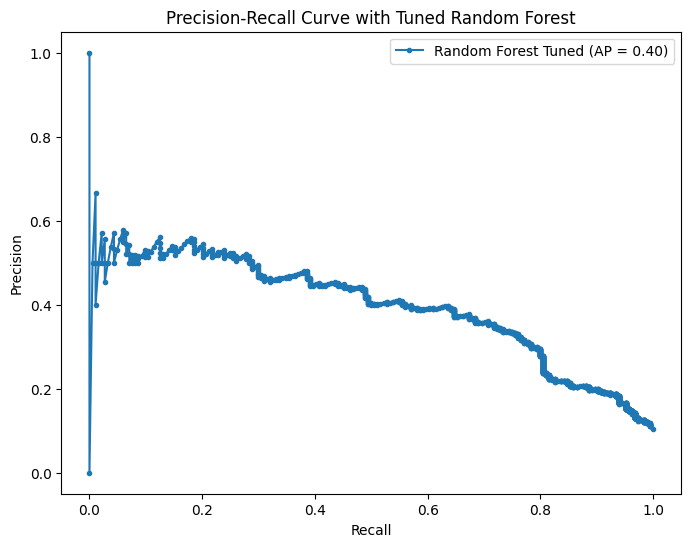

In [50]:
# Evaluating model performance after tuning the model with same metrics

# Display best parameters and classification report
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred_tuned))
print("Average Precision (AUC-PR):", ap_score)

# Print TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_tuned).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

# Precision-Recall Curve and Average Precision Score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned)
ap_score = average_precision_score(y_test, y_pred_proba_tuned)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest Tuned (AP = {:.2f})'.format(ap_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Tuned Random Forest')
plt.legend()
plt.show()

## Model Performance After Hyperparameter Tuning
---
After tuning with RandomizedSearchCV, the best parameters for the Random Forest model were:

- n_estimators: 100
- min_samples_split: 5
- min_samples_leaf: 4
- max_depth: 20

**Classification Report:**

- Class 0 (Unsuccessful Loans): The model maintains high accuracy in identifying unsuccessful loans, minimizing financial risk.
- Class 1 (Successful Loans): Precision for successful loans saw a slight decline, but recall improved significantly, indicating better capture of successful loans and fewer missed opportunities.
  
**Confusion Matrix Analysis:**

- True Positives (TP) increased to 90 (from 32), indicating substantial improvement in identifying successful loans.
- False Positives (FP) rose to 122 (from 31), a trade-off resulting from improved recall.
- True Negatives (TN) decreased to 1464 (from 1555), but the model remains highly accurate for unsuccessful loans.
- False Negatives (FN) dropped to 94 (from 152), reducing missed eligible loans.
  
- AUC-PR Score: Improved from 0.17 to 0.40, doubling the model’s balance between precision and recall, making it more effective with the imbalanced dataset.

**Key Observations:**
- _**Recall Improvement:**_ Recall for successful loans increased from 0.17 to 0.49, capturing more eligible applications.
- _**Precision Trade-Off:**_ Precision decreased slightly from 0.51 to 0.42 due to improved recall, resulting in more false positives, though the rate remains relatively low.

Post-tuning, the model better balances recall for successful loans with precision for unsuccessful loans, aligning with the goal of identifying eligible loans while controlling financial risk. Further fine-tuning of thresholds could be considered to refine this balance further.

## Suggestions for Further Improving Model Performance
---
While the tuned model demonstrates improved recall and a balanced approach to precision, a few limitations remain. The model’s recall for successful loans, though improved, is still moderate, and the slight drop in precision indicates a trade-off resulting in more false positives. To address these, we could explore advanced ensemble methods like _Gradient Boosting_ or _XGBoost_, which often provide finer control over decision boundaries. Additionally, fine-tuning the _decision threshold_ could help optimize the precision-recall balance without sacrificing one metric over the other. Lastly, incorporating _additional relevant features_ that capture nuanced credit behavior could further enhance prediction accuracy and reduce financial risk.







# Decision Making with the Model

**1. Business Context:**

In the business context, the model serves as a tool to support loan approval decisions, focusing on responsible lending. By predicting the likelihood of loan success, the model helps to:

- Identify high-risk (unsuccessful) loans with high precision, we can avoid approvals that could lead to defaults, reducing financial loss.
- With improved recall for successful loans, the model helps capture more eligible applicants, ensuring that fewer qualified candidates are mistakenly rejected. This supports customer satisfaction and revenue growth by enabling company to offer loans to more reliable applicants.
- By filtering applications upfront, the model streamlines the approval process, allowing resources to focus on high-confidence decisions.
  
**2. Technical Context:**

From a technical perspective, the model outputs a probability score indicating the likelihood of loan success. This score can be used in several ways:

- By setting a threshold based on companies risk tolerance, we can adjust the sensitivity of loan approvals. For instance, a higher threshold may be set to prioritize precision, reducing false positives, while a lower threshold could increase recall if lender seeks to maximize successful applicants.
- The feature importance scores help explain the rationale behind each decision, supporting transparency in model predictions. This is critical for governance and regulatory requirements, as it shows which factors contribute most to approval or rejection.
  
**Summary**
By integrating the model into the loan approval process, Lender can make data-driven decisions that balance financial risk and growth opportunities, with flexibility for adjusting strategies based on evolving business goals.

# Model Governance Considerations
To ensure that our loan approval model remains accurate, fair, and compliant, we propose a governance framework focused on regular monitoring, fairness checks, documentation, and adaptation to data changes.

---
First, monitoring model performance is essential to detect any dips in effectiveness over time. We would track key metrics such as AUC-PR and Precision on a regular basis (monthly or quarterly) to ensure the model continues to perform well. If we see a sudden drop, it might signal data drift or changes in loan applicant behavior, prompting a closer investigation. Additionally, it’s important to periodically review and adjust the model’s decision threshold. As business needs or data patterns shift, recalibrating the threshold can help maintain a balance between precision and recall, ensuring the model’s outputs remain aligned with Lendable’s objectives.

Bias and fairness checks are equally critical to avoid unintended discrimination in loan approvals. Regular audits on key features, like credit utilization or outstanding balances, help ensure that these features don’t introduce unintended bias. Moreover, running fairness assessments, such as disparate impact analysis, can help verify that the model isn’t disproportionately affecting certain demographic groups. By keeping an eye on both the features and the outcomes, we can support responsible lending practices and equitable access to credit.

Transparency is another cornerstone of responsible model governance, which is why documentation and version control are essential. Comprehensive documentation, covering everything from feature selection and training data to evaluation metrics and decision rationale, makes it easier to explain and defend model decisions if questions arise. For regulatory compliance, versioning the model and tracking updates allows us to see the reasoning behind each change, helping ensure the model remains auditable and consistent with Lendable’s lending standards.

Finally, we need to be proactive about handling model drift and data drift. Over time, changes in the economy or applicant behavior can shift patterns in the data, impacting model performance. Monitoring AUC-PR and Precision will help detect model drift, and if it occurs, retraining the model with more recent data can help realign it with current trends. Similarly, checking recent data against the training data can reveal data drift, which may require us to adjust the feature engineering process or even adapt the model pipeline to better capture new applicant behaviors.

---
By incorporating regular monitoring for model drift and data drift, we can ensure that the model continues to make accurate, fair, and relevant predictions, aligning with the company’s commitment to responsible lending.


# Model Productionization Strategy
To integrate the loan approval model into operations effectively, We would need a scalable, reliable, and maintainable environment, allowing for real-time or batch processing of loan applications that integrates seamlessly with existing workflows and ensures consistent, responsible decision-making in loan approvals.

---
## 1. Deployment Infrastructure and API Access

To deploy our model effectively, we could use FastAPI to create a RESTful API, providing a fast and lightweight solution for serving predictions. FastAPI is ideal for production environments due to its high performance and asynchronous capabilities, enabling it to handle large volumes of requests efficiently. With this setup, Lendable’s loan processing system could submit real-time requests to the API and receive immediate responses for each loan application.

With FastAPI, real-time scoring becomes possible, allowing each application to be evaluated as soon as it’s submitted, leading to instant approval or rejection decisions. FastAPI also supports batch processing, which could be useful for scheduled scoring updates, especially if Lendable prefers daily or weekly batch evaluations to incorporate updated applicant data or economic changes.

Deploying the model on a cloud platform (AWS, GCP, or Azure) offers scalability and flexibility, as cloud infrastructure can automatically scale resources during peak application times. Additionally, cloud platforms provide essential security features, such as encryption and role-based access, to protect sensitive data in compliance with regulations. Using managed services like AWS SageMaker or GCP AI Platform ensures reliability and uptime, both critical for production-level applications.

## 2. Model Retraining Pipelines

To keep the model current with evolving data, we recommend establishing a CI/CD pipeline for scheduled retraining. This setup enables regular retraining and deployment with minimal manual intervention. The pipeline could be scheduled semi-annually or triggered by a specific event, such as a drop in key performance metrics like AUC-PR, ensuring the model stays aligned with applicant behavior and economic conditions.

Automated data ingestion is another essential part of this retraining pipeline. By using cloud-based tools like AWS Glue or GCP Dataflow, we can automate data cleaning, feature engineering, and training set updates, ensuring that the latest data is available for model retraining. Before deploying any updated model version, model validation and testing would confirm its performance against historical data and verify that it meets business requirements, maintaining alignment with Lendable’s objectives.

---

By following this deployment strategy, We will be equipped with a scalable, reliable, and flexible system that integrates seamlessly with existing workflows and ensures consistent, responsible decision-making in loan approvals.
